In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import joblib

In [2]:
train = pd.read_csv('train_set.csv')
train.shape

(3790012, 6)

In [3]:
train.head()

,type,amount,isFraud,diffOrg,diffdest,transaction_time
0,CASH_OUT,126017.23,0,-14108.00,126017.23,Night
1,TRANSFER,1023875.14,0,-105694.00,1023875.14,Afternoon
2,CASH_OUT,109834.01,0,-109834.01,109834.00,Afternoon
3,TRANSFER,1056290.17,0,-32812.00,1056290.17,Morning
4,TRANSFER,24991611.22,0,-102593.39,24991611.23,Afternoon


In [5]:
x_train,y_train = train.drop(columns=['isFraud']),train['isFraud']
x_train.shape,y_train.shape

((3790012, 5), (3790012,))

In [6]:
# model 
model = joblib.load('fraud_pipeline.joblib')

In [7]:
y_prob = model.predict_proba(x_train)[:,1]

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [8]:
def decision(prob):
    result = []
    for i in range(len(prob)):
        if prob[i]>=0.99:
            result.append('Block')
        elif prob[i]<0.99 and prob[i]>=0.30:
            result.append('Review')
        else:
            result.append('Allow')
    return result

In [9]:
y_pred = decision(y_prob)

In [10]:
eda_temp = x_train.copy()

In [11]:
eda_temp['y_orig'] = y_train
eda_temp['y_pred'] = y_pred 

In [13]:
eda_temp.head()

,type,amount,diffOrg,diffdest,transaction_time,y_orig,y_pred
0,CASH_OUT,126017.23,-14108.00,126017.23,Night,0,Allow
1,TRANSFER,1023875.14,-105694.00,1023875.14,Afternoon,0,Allow
2,CASH_OUT,109834.01,-109834.01,109834.00,Afternoon,0,Allow
3,TRANSFER,1056290.17,-32812.00,1056290.17,Morning,0,Allow
4,TRANSFER,24991611.22,-102593.39,24991611.23,Afternoon,0,Allow


In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")

In [20]:
eda_temp['amount'] = pt.fit_transform(eda_temp['amount'].values.reshape(-1,1))
eda_temp['diffOrg'] = pt.fit_transform(eda_temp['diffOrg'].values.reshape(-1,1))
eda_temp['diffdest'] = pt.fit_transform(eda_temp['diffdest'].values.reshape(-1,1))

In [64]:
# eda_temp['amount'] = np.log1p(eda_temp['amount'])
# eda_temp['diffOrg'] = np.log1p(eda_temp['diffOrg'])
# eda_temp['diffdest'] = np.log1p(eda_temp['diffdest'])

C:\Users\Yogesh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Yogesh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
manual = eda_temp[eda_temp['y_pred']=='Review']
manual.head()

,type,amount,diffOrg,diffdest,transaction_time,y_orig,y_pred
27,CASH_OUT,-0.525113,-0.660104,0.121268,Morning,0,Review
82,CASH_OUT,0.034903,-1.039520,0.198942,Night,0,Review
113,CASH_OUT,0.969107,-2.358259,0.454717,Afternoon,0,Review
125,CASH_OUT,-0.581022,-0.633075,0.115593,Morning,0,Review
146,CASH_OUT,-1.963767,-0.315296,0.045740,Morning,0,Review


In [22]:
manual_fraud = manual[(manual['y_orig']==1) & (manual['y_pred']=='Review')]

In [23]:
manual['type'].value_counts()

type
CASH_OUT    92919
TRANSFER      176
DEBIT           1
Name: count, dtype: int64

In [25]:
manual_fraud['type'].value_counts()

type
CASH_OUT    1657
TRANSFER      18
Name: count, dtype: int64

<Axes: xlabel='y_orig', ylabel='type'>

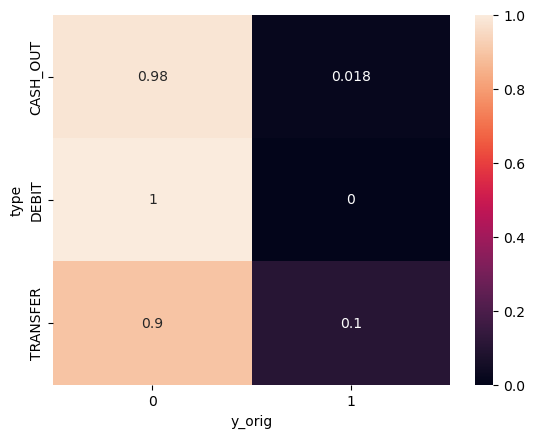

In [32]:
sns.heatmap(pd.crosstab(index=manual['type'],columns=manual['y_orig'],normalize='index'),annot=True)

# transaction for review sended by model can not classified by type becasue in those transaction fraud case and non fraud case in each type have the same distribution.

<Axes: xlabel='diffdest', ylabel='Density'>

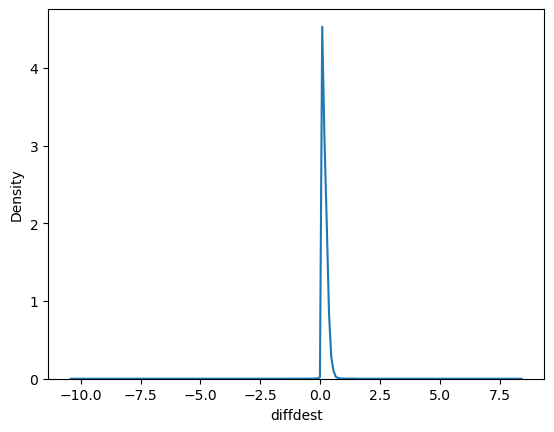

In [26]:
sns.kdeplot(manual['diffdest'])

<Axes: xlabel='diffdest', ylabel='Density'>

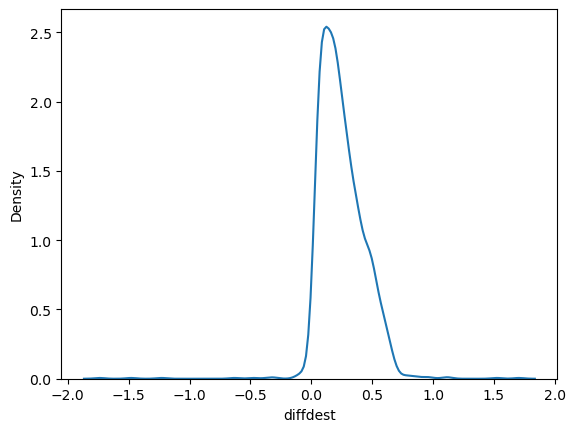

In [27]:
sns.kdeplot(manual_fraud['diffdest'])

# receiver all have same distribution for fraud and non fraud case.

<Axes: xlabel='diffOrg', ylabel='Density'>

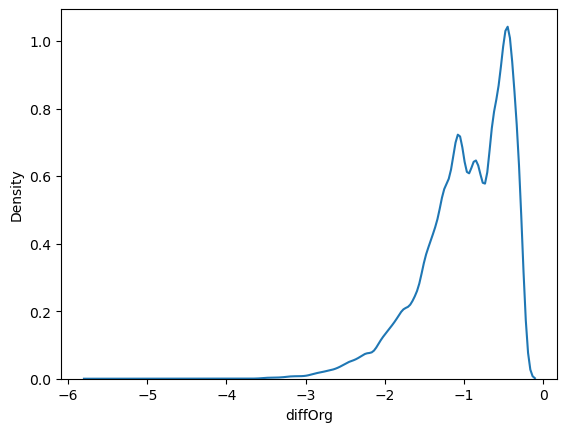

In [33]:
sns.kdeplot(manual['diffOrg'])

<Axes: xlabel='diffOrg', ylabel='Density'>

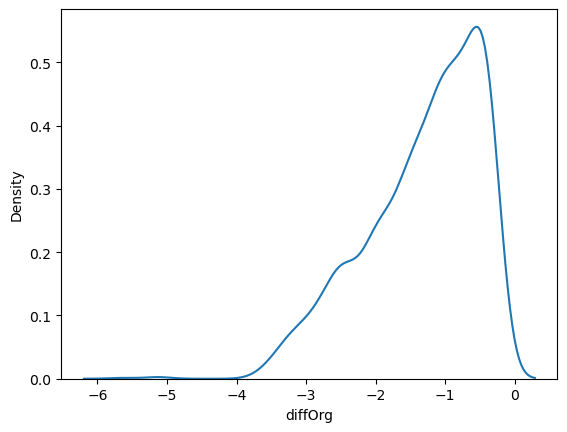

In [35]:
sns.kdeplot(manual_fraud['diffOrg'])

# sender balance change all have kind of similar distribution for fraud and non fraud case.

<Axes: xlabel='amount', ylabel='Density'>

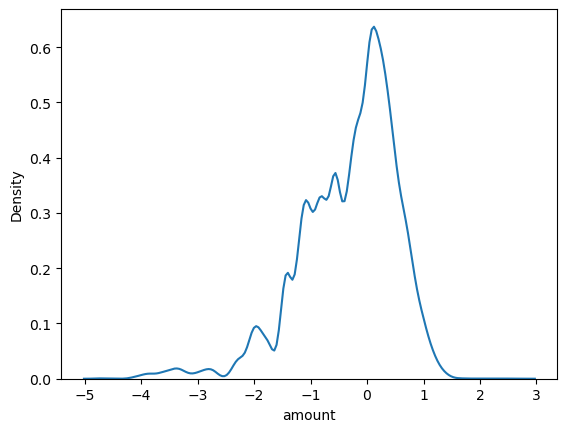

In [36]:
sns.kdeplot(manual['amount'])

<Axes: xlabel='amount', ylabel='Density'>

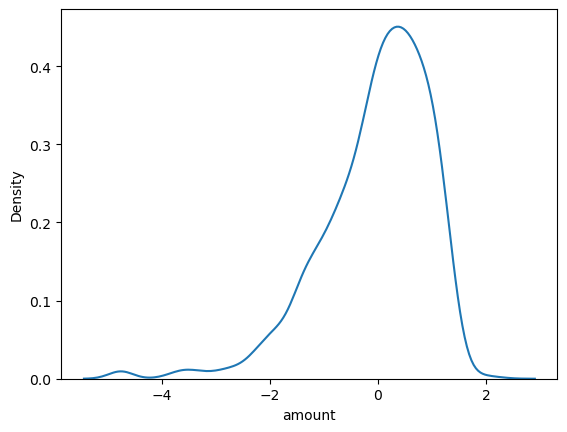

In [38]:
sns.kdeplot(manual_fraud['amount'])

# No clue at all.

<Axes: xlabel='y_orig', ylabel='transaction_time'>

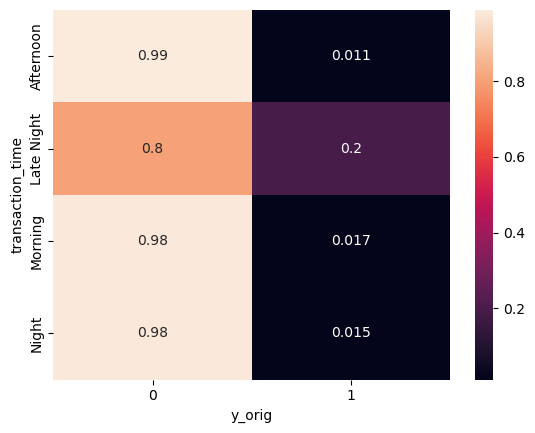

In [40]:
sns.heatmap(pd.crosstab(index=manual['transaction_time'],columns=manual['y_orig'],normalize='index'),annot=True)